### Predicting whether a candy is a chocolate or not from its features.
This project is based on data: [Ultimate Halloween Candy Power Ranking](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking). It uses Logistic Regression Model to predict whether the candy is chocolate or not from other features like fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent and winpercent.

##### Initialising Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Reading data from CSV file: 'candy-data.csv'
When reading data first column is converted into row index.

In [2]:
train=pd.read_csv('candy-data.csv',index_col=0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB


Firstly checking the information about the data we found that there are 85 rows and 12 columns. Among 12 columns 3 of them are float type and 9 of them are int type. 

##### Now, let us check the samples of the data in the file.

In [4]:
train.head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963


From this above details we can see that the data are all in numerical form so it is compatible for Logistic Regression.

##### Let's check for null data:

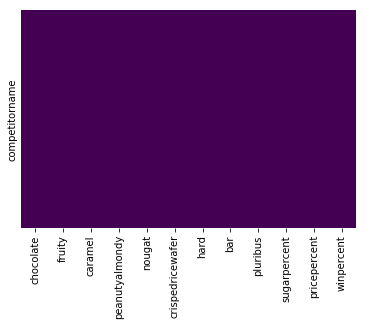

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From above graph we can see that there is uniformity in color so this indicates that there are no null data.

##### Now let's perform some visualization on the relations between different features:

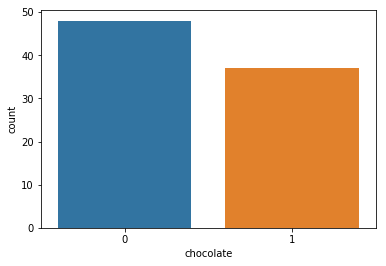

In [6]:
sns.countplot(x='chocolate',data=train)

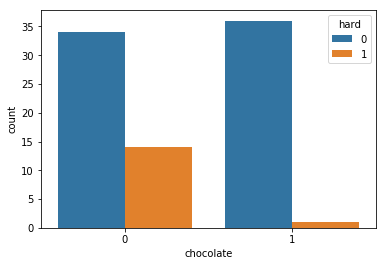

In [7]:
sns.countplot(x='chocolate',hue='hard',data=train)

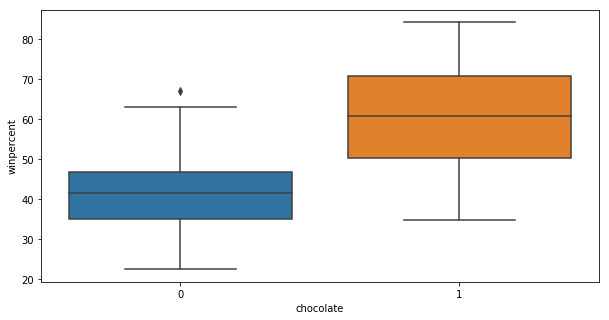

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='chocolate',y='winpercent',data=train)

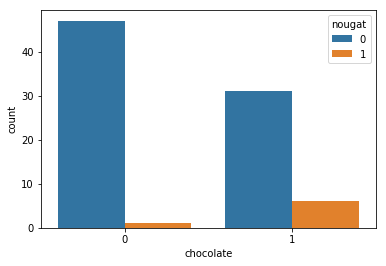

In [9]:
sns.countplot(x='chocolate',hue='nougat',data=train)

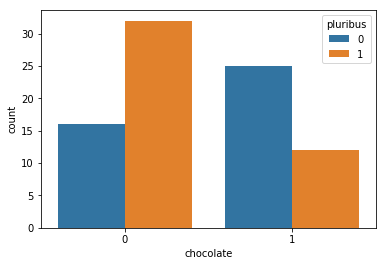

In [10]:
sns.countplot(x='chocolate',hue='pluribus',data=train)

#### Training of the Logistic Regression Model
Since we only have one dataset we are going to use the sklearn train_test_split feature to split the data into train and test datasets and use them for training and testing of the model.

We are going to predict the chocolate or not using other features so we put other features in X training set and chocolate in y training set i.e. since it is Supervised Learning we make X: known inputs and y: known outputs.

In [11]:
X=train.drop('chocolate',axis=1)
y=train['chocolate']

##### Below are the features used to predict chocolate or not.

In [12]:
X.columns

Index(['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent',
       'winpercent'],
      dtype='object')

Now we import train_test_split model to split data into train and test datasets.

In [13]:
from sklearn.model_selection import train_test_split

##### Below here is the dataset splitting process:
+ X_train = X training set
+ X_test = X testing set
+ y_train = y taining set
+ y_test = y testing set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Fitting of Logistic Regression
Let us import LogisticRegression from sklearn.linear_model and assign it to logmodel.

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel=LogisticRegression()

###### Now fitting of the X_train and y_train dataset into the Logistic Regression model.

In [17]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
logmodel.coef_

array([[-2.13230233, -0.06344853, -0.10338907, -0.23384201,  0.42373264,
        -0.45655696,  0.60201176, -0.68058345, -0.23160968,  0.26548865,
         0.0487377 ]])

Above are the logistic regression coefficients obtained after fitting the Logistic Regression model with training datasets.

#### Predicting of the results:
Now let us predict the results using the X_test dataset.

In [19]:
predictions=logmodel.predict(X_test)

#### Classification Report:
Now let us observe the Classification Report using the sklearn.metrics.classification_report.    

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.83      1.00      0.91        10

   micro avg       0.93      0.93      0.93        29
   macro avg       0.92      0.95      0.93        29
weighted avg       0.94      0.93      0.93        29



#### Confusion Matrix:
It is a lot easier to view the observation of the results of the predictions using the Confusion Matrix.

##### Let us view the graph of confusion matrix:

In [22]:
from sklearn.metrics import confusion_matrix

[[17  2]
 [ 0 10]]


Text(0.5, 1.0, 'Possibility of being chocolate')

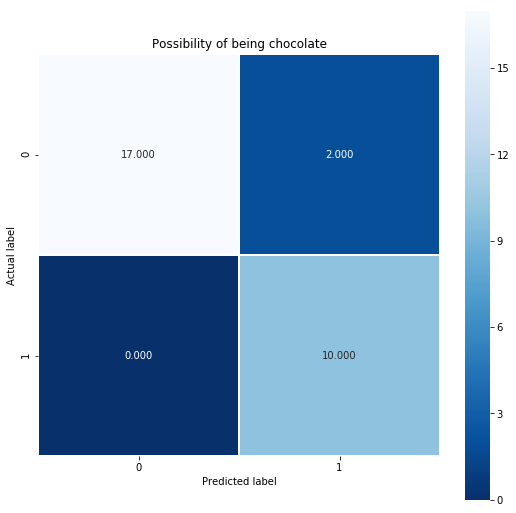

In [23]:
cm=confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Possibility of being chocolate')

In [24]:
score=logmodel.score(X_test,y_test)
print("Score: ",score)
print("Accuracy Percentage: %.3f"%(score*100),"%")

Score:  0.9310344827586207
Accuracy Percentage: 93.103 %


### Conclusion
Analysis of predictions:
+ True Negatives  = 51.72 %
+ False Positive  = 6.89 %
+ True Positives  = 37.93 %
+ False Negatives = 3.44 %

True Negatives(51.72) + True Positives(37.93) = Accuracy of Model(89.65 %).

From the above analysis we found that the Accuracy of our model is 89.65%.